In [ ]:
!pip install -U scikit-learn
!pip install -U imbalanced-learn

#Importing Libraries

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold, cross_val_score
from imblearn.pipeline import Pipeline

#Train Dataset

In [ ]:
data = pd.read_csv("aug_train.csv")
data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


#Test Dataset

In [ ]:
test = pd.read_csv("aug_test.csv")
test

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


#Cleaning data

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)


In [ ]:
# data = data.drop('city',axis=1)
# test = test.drop('city',axis=1)


In [ ]:
data = data.drop(columns=["enrollee_id"])
test = test.drop(columns=["enrollee_id"])

In [ ]:
data['company_size'] = data['company_size'].replace('10/49', np.nan)
data['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [ ]:
test['company_size'] = test['company_size'].replace('10/49', np.nan)
test['company_size'].value_counts()

50-99        338
100-500      318
10000+       217
<10          163
1000-4999    143
500-999       88
5000-9999     68
Name: company_size, dtype: int64

In [ ]:
#replacing all the missing values
data = data.fillna(method="pad")
data.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,city_115,0.789,Male,No relevent experience,Full time course,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
#replacing all the missing values
test= test.fillna(method="pad")
test.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,<10,Pvt Ltd,1,98
2,city_21,0.624,Male,No relevent experience,no_enrollment,High School,STEM,<1,<10,Pvt Ltd,never,15
3,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,<10,Pvt Ltd,1,39
4,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [ ]:
numerical_columns=[ 'city_development_index','training_hours','target']
categorical_columns=['city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_type','last_new_job']

In [ ]:
data[numerical_columns].describe()

,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000
mean,0.828848,65.366896,0.249348
std,0.123362,60.058462,0.432647
min,0.448000,1.000000,0.000000
25%,0.740000,23.000000,0.000000
50%,0.903000,47.000000,0.000000
75%,0.920000,88.000000,0.000000
max,0.949000,336.000000,1.000000


#Visualizing Data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


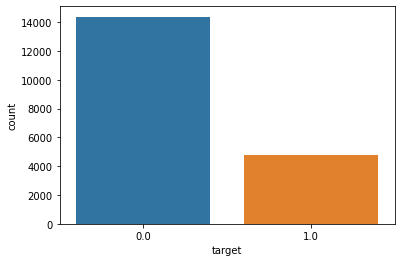

In [ ]:
sns.countplot(data['target'])

In [ ]:
data['target'].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

0: Not Looking for job
1: Looking for job


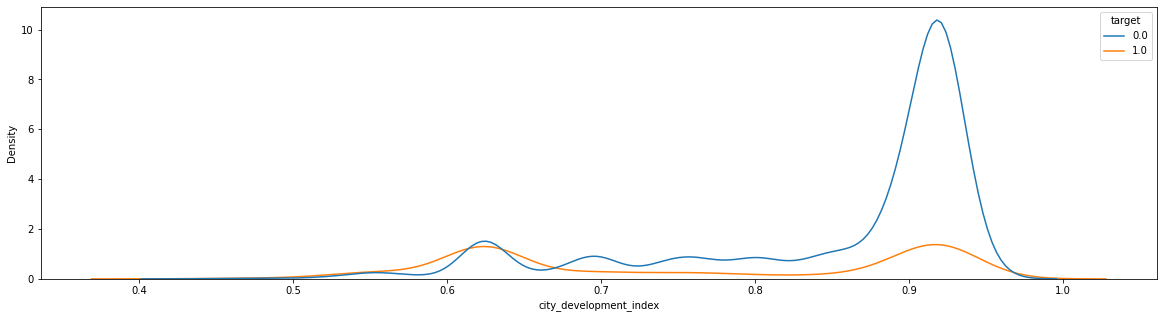

In [ ]:
plt.figure(figsize=(20, 5))
sns.kdeplot(data=data, x="city_development_index", hue="target")
print("0: Not Looking for job")
print("1: Looking for job")

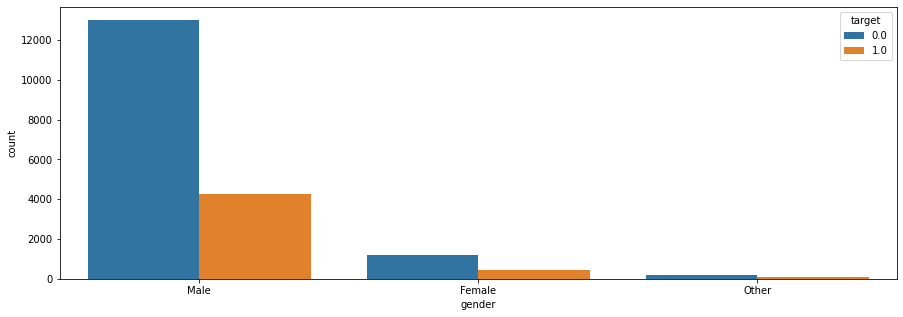

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'gender',hue='target',data=data)

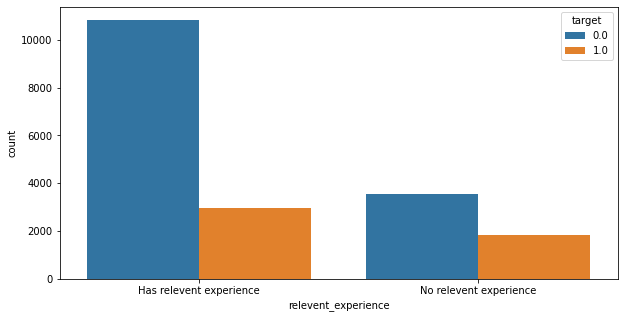

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x = 'relevent_experience',hue='target',data=data)

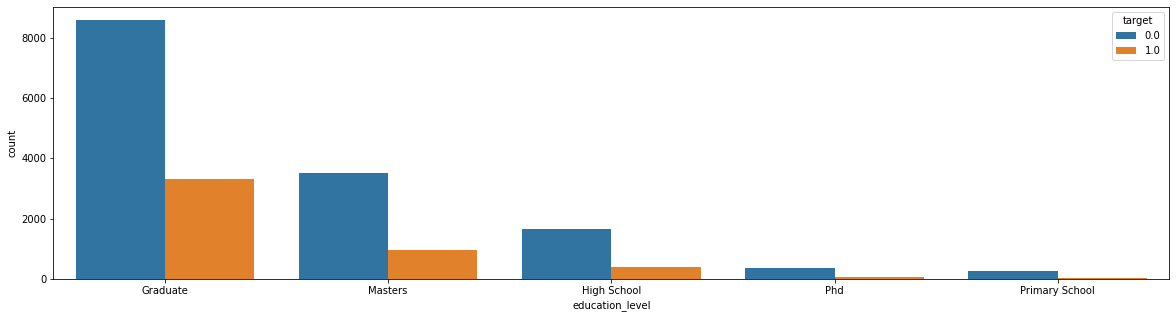

In [ ]:
plt.figure(figsize=(20, 5))
sns.countplot(x = 'education_level',hue='target',data=data)

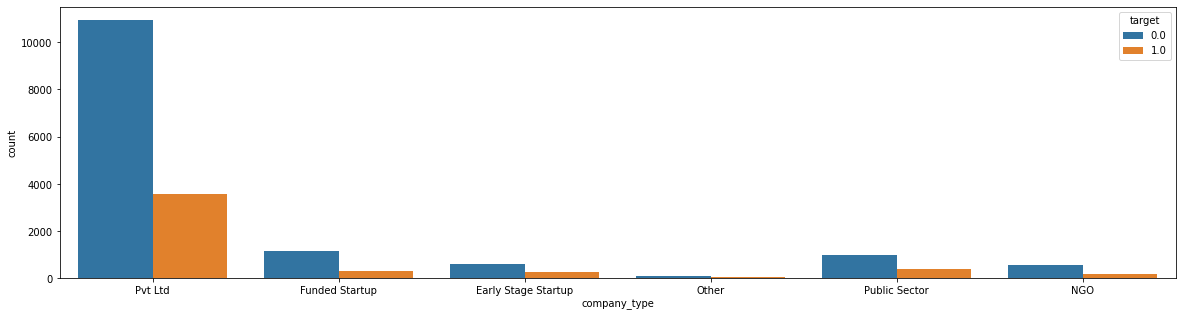

In [ ]:
plt.figure(figsize=(20, 5))
sns.countplot(x = 'company_type',hue='target',data=data)

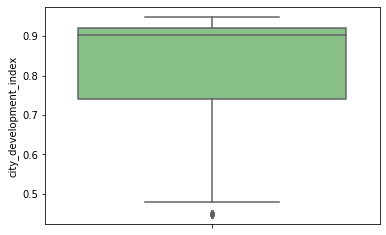

In [ ]:
sns.boxplot(y = 'city_development_index', data = data,palette='Accent')

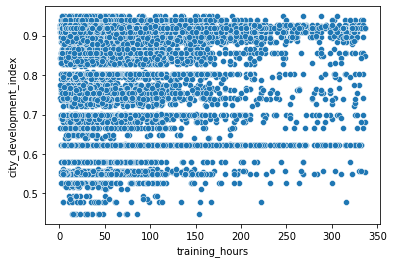

In [ ]:
sns.scatterplot(y=data['city_development_index'],x=data['training_hours'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


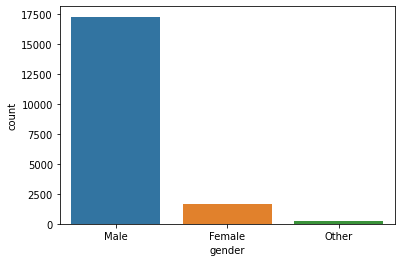

In [ ]:
sns.countplot(data['gender'])

In [ ]:
df = data.groupby(['gender','target']).count().reset_index()

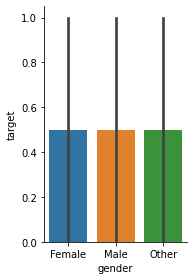

In [ ]:
g = sns.catplot(x="gender", y="target",
                data=df, kind="bar",
                height=4, aspect=.7);

In [ ]:
df = data.groupby(['gender'])['relevent_experience'].count().to_frame().reset_index()
df

,gender,relevent_experience
0,Female,1647
1,Male,17260
2,Other,251


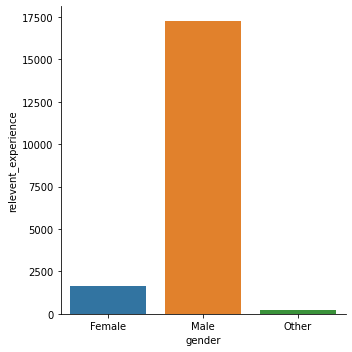

In [ ]:
sns.catplot(x="gender", y="relevent_experience",
                data=df, kind="bar");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


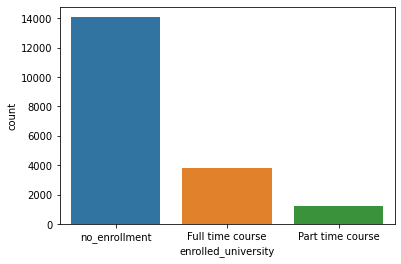

In [ ]:
sns.countplot(data['enrolled_university'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


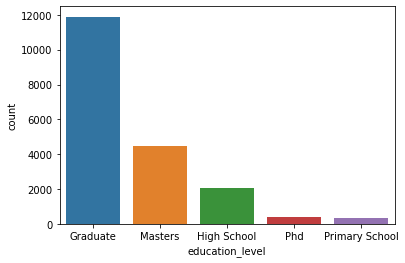

In [ ]:
sns.countplot(data['education_level'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


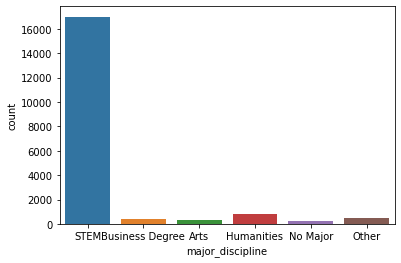

In [ ]:
sns.countplot(data['major_discipline'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


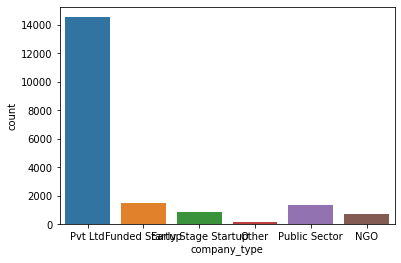

In [ ]:
sns.countplot(data['company_type'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


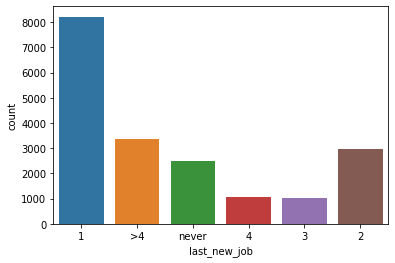

In [ ]:
sns.countplot(data['last_new_job'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


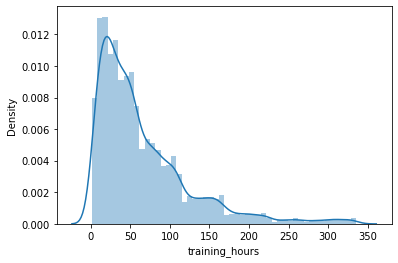

In [ ]:
sns.distplot(data['training_hours'])

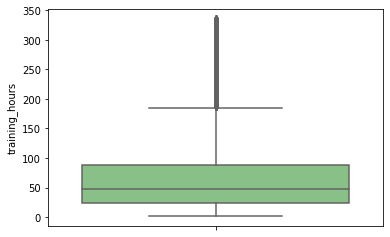

In [ ]:
sns.boxplot(y = 'training_hours', data = data,palette='Accent')

In [ ]:
num_columns=[ 'city_development_index','training_hours','target']
cat_columns=['city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_type','last_new_job']

#Encoding Columns

In [ ]:
from sklearn.preprocessing import LabelEncoder 

experience_dict = {'Has relevent experience' : 1,
             'No relevent experience': 0}

education_dict = {'Graduate' : 2,
             'Masters' : 1,
             'Phd' : 0}

enrollment_dict = {'no_enrollment' : 2,
             'Full time course' : 1,
             'Part time course' : 0}

gender_dict = {'Male' : 2,
             'Female' : 1,
             'Other' : 0}

discipline_dict = {'STEM' : 5,
             'Humanities' : 4,
             'Business Degree' : 3,
             'Other' : 2,
             'No Major' : 1,
             'Arts' : 0 }

company_dict = {'Pvt Ltd' : 5,
             'Funded Startup' : 4,
             'Public Sector' : 3,
             'Early Stage Startup' : 2,
             'NGO' : 1,
             'Other' : 0 }


# Train encoding
le = LabelEncoder()
data['city'] = le.fit_transform(data['city'])
test['city'] = le.fit_transform(test['city'])
data['gender'] = data['gender'].map(gender_dict)
data['relevent_experience'] = data['relevent_experience'].map(experience_dict)
data['education_level'] = data['education_level'].map(education_dict)
data['enrolled_university'] = data['enrolled_university'].map(enrollment_dict)
data['major_discipline'] = data['major_discipline'].map(discipline_dict)
data['experience'] = le.fit_transform(data['experience'].astype(str))
data['company_size'] = le.fit_transform(data['company_size'].astype(str))
data['company_type'] = data['company_type'].map(company_dict)
data['last_new_job'] = le.fit_transform(data['last_new_job'].astype(str))


In [ ]:
# Applying changes on test dataset
test['gender'] = le.fit_transform(test['gender'].astype(str))
test['relevent_experience'] = test['relevent_experience'].map(experience_dict)
test['education_level'] = test['education_level'].map(education_dict)
test['enrolled_university'] = test['enrolled_university'].map(enrollment_dict)
test['major_discipline'] = test['major_discipline'].map(discipline_dict)
test['experience'] = le.fit_transform(test['experience'].astype(str))
test['company_size'] = le.fit_transform(test['company_size'].astype(str))
test['company_type'] = test['company_type'].map(company_dict)
test['last_new_job'] = le.fit_transform(test['last_new_job'].astype(str))


In [ ]:
print(type(data),type(test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

In [ ]:
data['target'] = data['target'].astype(int)

In [ ]:
# test

In [ ]:
X_train = data.drop('target',axis=1)
Y_train = data['target']

In [ ]:
# X_train = data.drop('enrollee_id',axis=1)

In [ ]:
X_train = X_train.fillna(X_train.mean())

In [ ]:
test = test.fillna(test.mean())

In [ ]:
# clean_dataset(X_train)
X_train['education_level'] = X_train['education_level'].astype(int)

#Applying SMOTE and KFold cross validation

In [ ]:


# fit and apply the transform
X_train,Y_train = SMOTE().fit_resample(X_train, Y_train)

In [ ]:
def runCV(algo, X, y):
  rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
  cv_results = cross_val_score(algo, X, y, cv=5, n_jobs=-1)
  print(f"Mean: {cv_results.mean()}, Std: {cv_results.std()}, Min: {cv_results.min()}, Max: {cv_results.max()}")

def hyperParameter(algo, params, X, y):
  rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
  grid = GridSearchCV(algo, param_grid=params, n_jobs=-1, cv=5, scoring= "accuracy")
  grid.fit(X,y)
  print('Best Score: ', grid.best_score_)
  print('Best Params: ', grid.best_params_)
  print('Cross validation on model with best params')
  runCV(grid.best_estimator_, X, y)
  return grid.best_estimator_

def plot_confusion_matrix(y_real, y_pred):
    cm = confusion_matrix(y_real, y_pred)

    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g')

    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

def metric(model):
  preds = model.predict(X_train)
  score = precision_recall_fscore_support(Y_train, preds)
  print('accuracy: ', accuracy_score(Y_train, preds))
  print('precision: ', score[0])
  print('recall: ', score[1])
  print('f1_score: ', score[2])
  print('support: ', score[3])
  print('AUC of ROC: ', roc_auc_score(Y_train, preds))
  plot_confusion_matrix(Y_train, preds)

#Logistic Regression

Best Score:  0.6780493191313137
Best Params:  {'model__max_iter': 100, 'model__n_jobs': -1, 'model__penalty': 'none'}
Cross validation on model with best params
Mean: 0.6767630337150092, Std: 0.024683938562881202, Min: 0.6384495046062924, Max: 0.700278164116829
accuracy:  0.6828454210416521
precision:  [0.66622416 0.70316001]
recall:  [0.73284194 0.6328489 ]
f1_score:  [0.69794702 0.6661543 ]
support:  [14381 14381]
AUC of ROC:  0.682845421041652


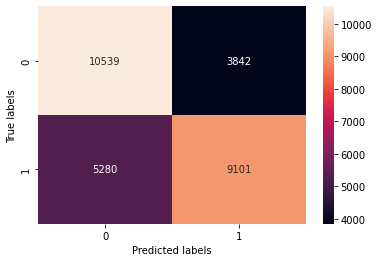

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
over = SMOTE(n_jobs=-1)

steps = [('over', over),  ('model', LogisticRegression())]
pipeline = Pipeline(steps=steps)

#log_params = {'model__penalty': ['none'], 'model__max_iter': [100, 200, 300, 400, 500], 'model__n_jobs': [-1]}

log_params = {'model__penalty': ['none'], 'model__max_iter': [100], 'model__n_jobs': [-1]}

model = hyperParameter(pipeline, log_params, X_train, Y_train)

metric(model)

In [ ]:
pred = model.predict(test)
pred

array([1, 0, 1, ..., 0, 0, 0])

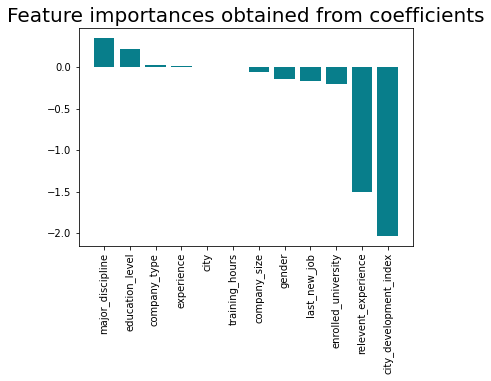

larger the coefficient is (in both positive and negative direction), the more influence it has on a prediction


In [ ]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.named_steps['model'].coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()
print("larger the coefficient is (in both positive and negative direction), the more influence it has on a prediction")

#KNeighbors Classifier

Best Score:  0.8033539071469514
Best Params:  {'model__n_neighbors': 2}
Cross validation on model with best params
Mean: 0.80366678738335, Std: 0.026543855432610997, Min: 0.7679471580045194, Max: 0.8306675938803895
accuracy:  0.9633544259787219
precision:  [0.93182555 0.99984997]
recall:  [0.99986093 0.92684792]
f1_score:  [0.96464511 0.96196594]
support:  [14381 14381]
AUC of ROC:  0.9633544259787219


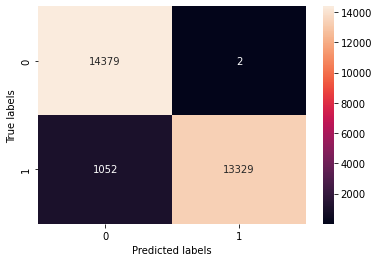

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
over = SMOTE(n_jobs=-1)

steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)

#params = {'model__n_neighbors': [2,3,4]}

params = {'model__n_neighbors': [2]}

model = hyperParameter(pipeline, params, X_train, Y_train)

metric(model)

In [ ]:
pred = model.predict(test)
pred

array([0, 0, 0, ..., 0, 0, 0])

#GaussianNB

Best Score:  0.7112532084004306
Best Params:  {}
Cross validation on model with best params
Mean: 0.7112532084004306, Std: 0.02713668623599067, Min: 0.6700851729532418, Max: 0.7369610570236439
accuracy:  0.7141367081565955
precision:  [0.71419629 0.71407716]
recall:  [0.71399764 0.71427578]
f1_score:  [0.71409695 0.71417646]
support:  [14381 14381]
AUC of ROC:  0.7141367081565955


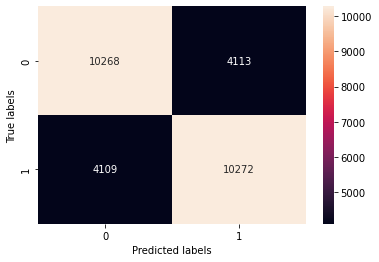

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
over = SMOTE(n_jobs=-1)

steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)

params = {}

model = hyperParameter(pipeline, params, X_train, Y_train)

metric(model)

In [ ]:
pred = model.predict(test)
pred

array([1, 1, 1, ..., 1, 1, 1])

#Decision Tree Classifier

Best Score:  0.7569758004954541
Best Params:  {}
Cross validation on model with best params
Mean: 0.75756679649754, Std: 0.05771892696876398, Min: 0.6657396141143751, Max: 0.8092837273991655
accuracy:  0.9987483485154023
precision:  [0.99784827 0.99965169]
recall:  [0.99965232 0.99784438]
f1_score:  [0.99874948 0.99874722]
support:  [14381 14381]
AUC of ROC:  0.9987483485154024


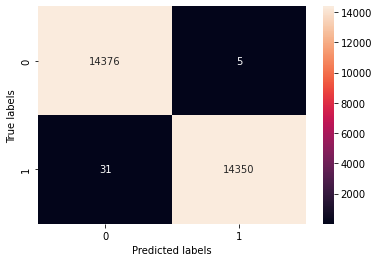

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)
over = SMOTE(n_jobs=-1)
under = RandomUnderSampler()

steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)

params = {}

model = hyperParameter(pipeline, params, X_train, Y_train)

metric(model)

In [ ]:
pred = model.predict(test)
pred

array([0, 1, 0, ..., 1, 0, 0])

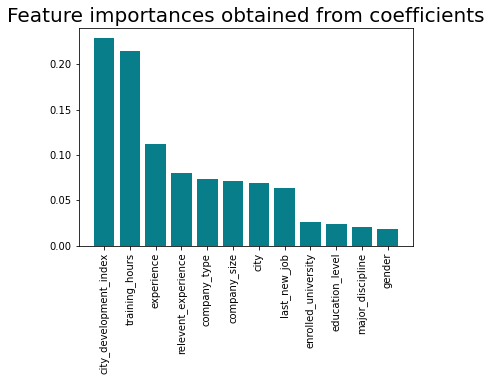

In [ ]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.named_steps['model'].feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

#Linear SVC

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Best Score:  0.604095867500466
Best Params:  {}
Cross validation on model with best params
Mean: 0.6287104726396604, Std: 0.05135053654456326, Min: 0.5648470097357441, Max: 0.7084492350486787
accuracy:  0.5747166400111258
precision:  [0.75589426 0.54374466]
recall:  [0.22070788 0.9287254 ]
f1_score:  [0.3416577  0.68590797]
support:  [14381 14381]
AUC of ROC:  0.5747166400111258


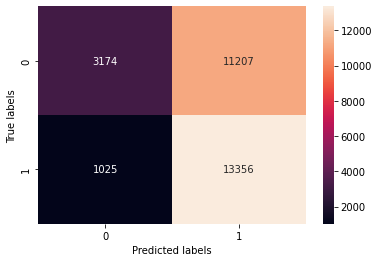

In [ ]:
from sklearn.svm import LinearSVC

model = LinearSVC()
over = SMOTE(n_jobs=-1)
under = RandomUnderSampler()

steps = [('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)

params = {'model__degree': [2,3,4], 'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'], 'model__gamma': ['scale', 'auto']}


params = {'model__degree': [2], 'model__kernel': ['linear'], 'model__gamma': ['auto']}

params = {}

model = hyperParameter(pipeline, params, X_train, Y_train)

metric(model)

In [ ]:
pred = model.predict(test)
pred

array([1, 1, 1, ..., 1, 1, 1])

## Random forest clasifier

Best Score:  0.8188292399659899
Best Params:  {'model__n_jobs': -1}
Cross validation on model with best params
Mean: 0.8191770115948455, Std: 0.07186391291044053, Min: 0.7032852424821832, Max: 0.877086230876217
accuracy:  0.9987135804186079
precision:  [0.99874826 0.9986789 ]
recall:  [0.99867881 0.99874835]
f1_score:  [0.99871354 0.99871363]
support:  [14381 14381]
AUC of ROC:  0.9987135804186079


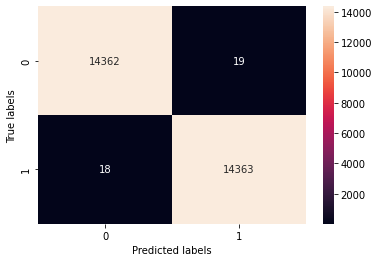

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
over = SMOTE(n_jobs=-1)
under = RandomUnderSampler()

steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)

params = {'model__n_jobs': [-1]}


model = hyperParameter(pipeline, params, X_train, Y_train)

metric(model)


In [ ]:
pred = model.predict(test)
pred

array([0, 0, 0, ..., 0, 1, 0])

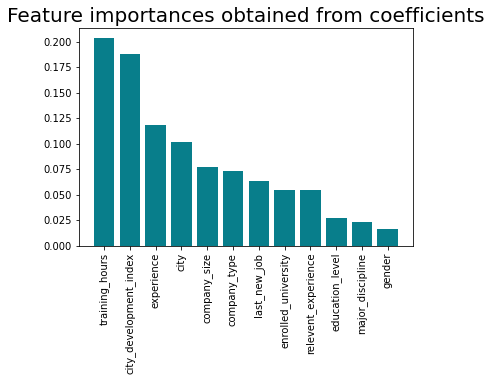

In [ ]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.named_steps['model'].feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

#Gradient Boost Classifier

Best Score:  0.784860387287808
Best Params:  {}
Cross validation on model with best params
Mean: 0.7853123254070501, Std: 0.06648081763112754, Min: 0.6732139753172258, Max: 0.8391863699582753
accuracy:  0.7964675613656909
precision:  [0.78654479 0.80710221]
recall:  [0.81378207 0.77915305]
f1_score:  [0.79993165 0.7928814 ]
support:  [14381 14381]
AUC of ROC:  0.7964675613656909


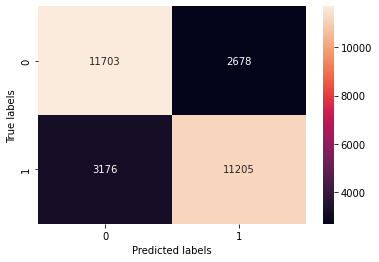

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
over = SMOTE(n_jobs=-1)
under = RandomUnderSampler()

steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)

params = {}

model = hyperParameter(pipeline, params,X_train,Y_train)

metric(model)



In [ ]:
pred = model.predict(test)
pred

array([1, 0, 1, ..., 0, 0, 0])

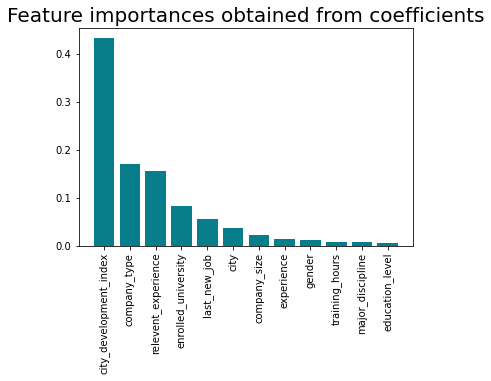

In [ ]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.named_steps['model'].feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


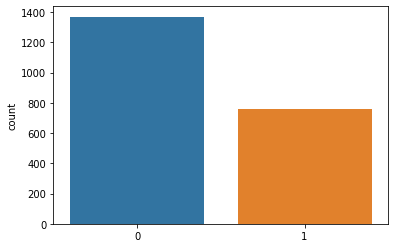

In [ ]:
d = pd.DataFrame(pred)
sns.countplot(pred)

#Random Forest Model is the best model with a score of 0.8188
# and accuracy of :0.9987 i.e. 99.87%
---



#As seen from feature coefficient graphs city development index is one the most important feature for the prediction of model followed by training hours and relevant experience